In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/training1600000.csv',encoding = "ISO-8859-1",header=None)

In [ ]:
df.columns = ["polarity",'id','date','query','user','tweet']
df

,polarity,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


# Missing Values

In [ ]:
df.isnull().sum()

polarity    0
id          0
date        0
query       0
user        0
tweet       0
dtype: int64

## Text Cleaning

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+',' ',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(w) for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [ ]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [ ]:
df_new = df[0:100000]

In [ ]:
df_neg = df[1500000:1600000]

,polarity,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df['clean_tweet'] = df['tweet'].apply(clean_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Data Visualization

# WordCloud

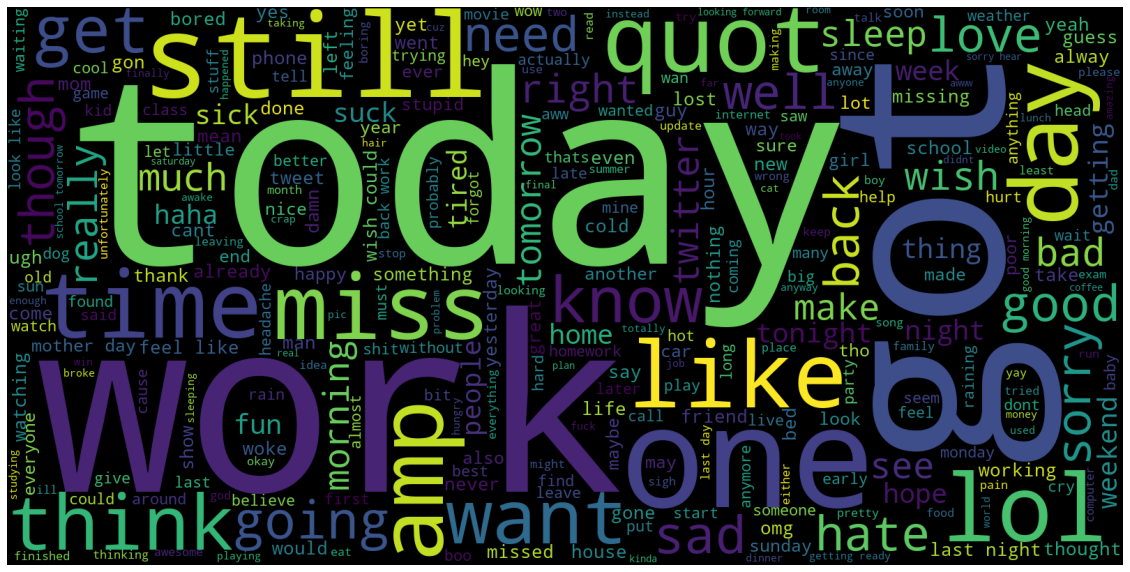

In [ ]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(df_new.clean_tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# WordCloud for positive tweets(polarity =4)





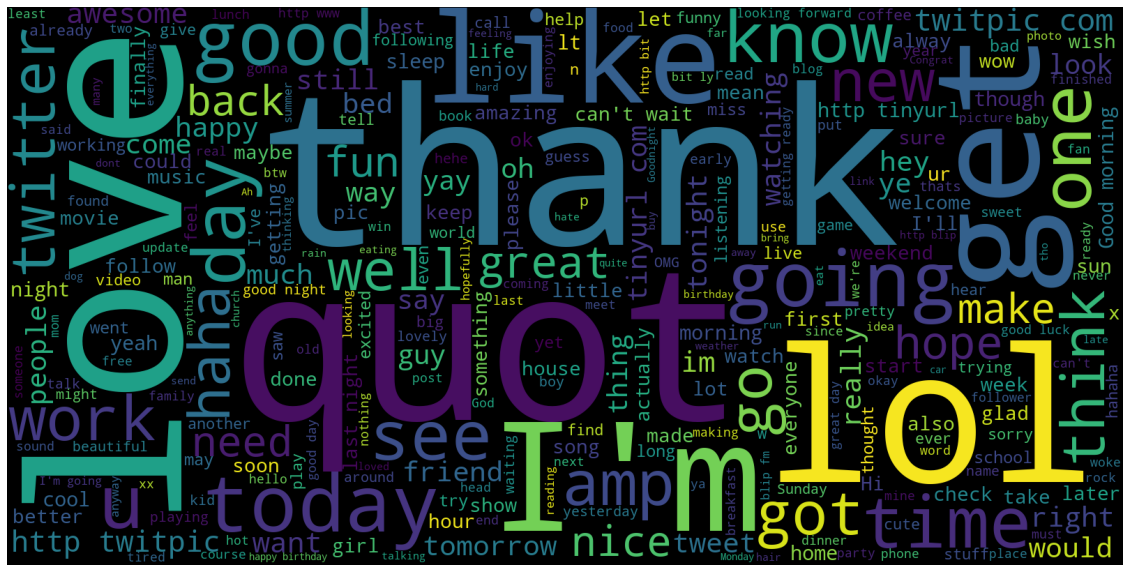

In [ ]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(df[df['polarity'] == 4][0:100000].tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()


## Wordcloud for Negative Tweets(polarity=0)

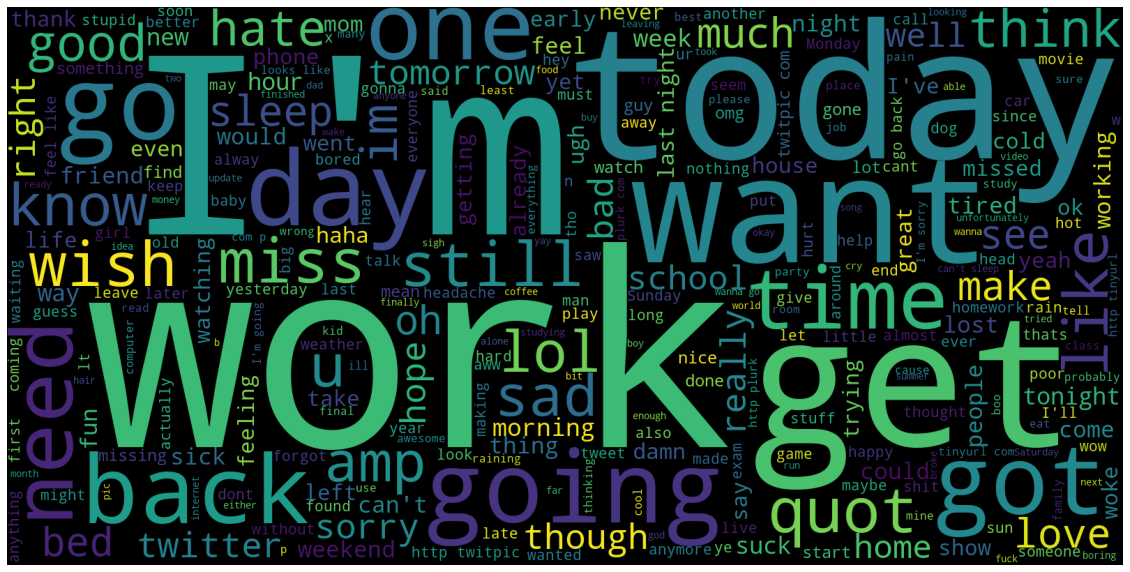

In [ ]:
plt.figure(figsize=(20,20))
STOPWORDS = set(stopwords.words('english'))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=STOPWORDS).generate(str(" ".join(df[df['polarity'] == 0][0:100000].tweet)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# Top 10 words

In [ ]:

top10_word = df_new[0:100000].clean_tweet.str.split(expand=True).stack().value_counts()[:10]

fig = px.bar(top10_word, color=top10_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top10_word.values])
fig.update_traces(hovertemplate='Count: %{customdata[0]}')

fig.update_layout(title="Top 10 words",
                  template='simple_white',
                  hovermode='x unified')
fig.show()